# Working with Regression Trees in Python

## Learning Objectives
Decision Trees are one of the most popular approaches to supervised machine learning. Decison Trees use an inverted tree-like structure to model the relationship between independent variables and a dependent variable. A tree with a continuous dependent variable is known as a **Regression Tree**. By the end of this tutorial, you will have learned:

+ How to import, explore and prepare data
+ How to build a Regression Tree model
+ How to visualize the structure of a Regression Tree
+ How to Prune a Regression Tree 

## 1. Collect the Data

In [1]:
import pandas as pd
income = pd.read_csv("data/income.csv")
income.head()

,Age,Education,Salary
0,25,Bachelors,43.9
1,30,Bachelors,54.4
2,45,Bachelors,62.5
3,55,Bachelors,72.5
4,65,Bachelors,74.6


## 2. Explore the Data

In [3]:
income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        30 non-null     int64  
 1   Education  30 non-null     object 
 2   Salary     30 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 848.0+ bytes


In [4]:
income.describe()

,Age,Salary
count,30.000000,30.000000
mean,43.366667,64.406667
std,14.375466,26.202684
min,24.000000,16.800000
25%,30.500000,46.350000
50%,45.000000,62.100000
75%,55.000000,76.800000
max,65.000000,118.000000


In [5]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

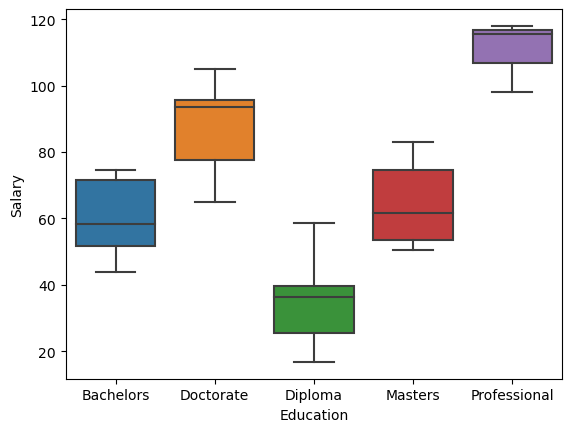

In [6]:
ax = sns.boxplot(data = income, x = 'Education', y = 'Salary')

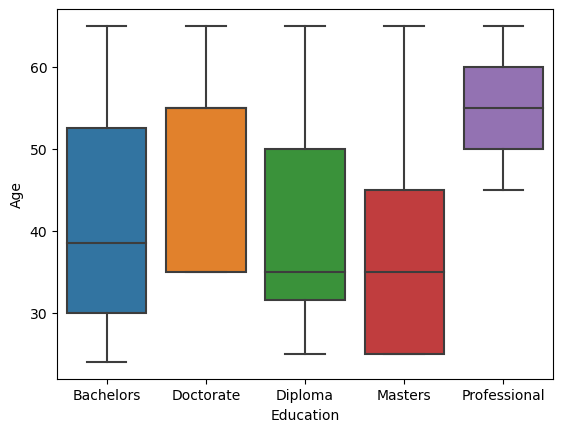

In [7]:
ax = sns.boxplot(data = income, x = 'Education', y = 'Age')

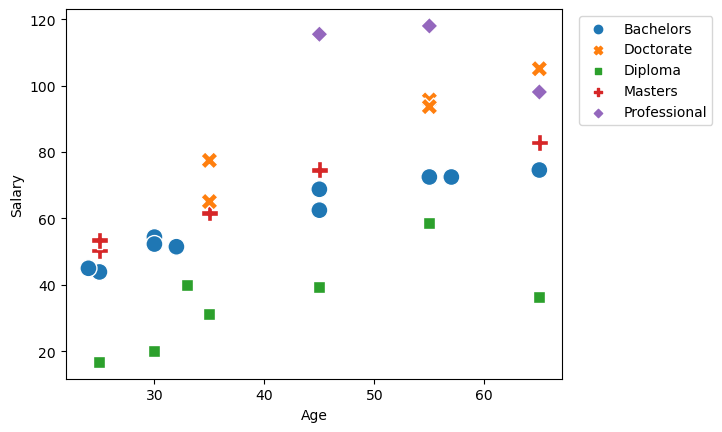

In [8]:
ax = sns.scatterplot(data = income, 
                     x = 'Age', 
                     y = 'Salary', 
                     hue = 'Education', 
                     style = 'Education', 
                     s = 150)
ax = plt.legend(bbox_to_anchor = (1.02, 1), loc = 'upper left')

## 3. Prepare the Data

In [2]:
y = income[['Salary']]

In [3]:
X = income[['Age', 'Education']]

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size = 0.7,
                                                    stratify = X['Education'],
                                                    random_state = 1234) 

In [5]:
X_train.shape, X_test.shape

((21, 2), (9, 2))

In [6]:
X_train.head()

,Age,Education
12,55,Diploma
18,45,Professional
25,35,Doctorate
2,45,Bachelors
0,25,Bachelors


In [7]:
X_train = pd.get_dummies(X_train)
X_train.head()

,Age,Education_Bachelors,Education_Diploma,Education_Doctorate,Education_Masters,Education_Professional
12,55,0,1,0,0,0
18,45,0,0,0,0,1
25,35,0,0,1,0,0
2,45,1,0,0,0,0
0,25,1,0,0,0,0


In [8]:
X_test = pd.get_dummies(X_test)
X_test.head()

,Age,Education_Bachelors,Education_Diploma,Education_Doctorate,Education_Masters,Education_Professional
21,25,0,0,0,1,0
22,30,1,0,0,0,0
20,24,1,0,0,0,0
7,65,0,0,1,0,0
19,55,0,0,0,0,1


## 4. Train and Evaluate the Regression Tree

In [9]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 1234)

In [10]:
model = regressor.fit(X_train, y_train)

In [18]:
model.score(X_test, y_test)

0.5853149222529794

In [19]:
y_test_pred = model.predict(X_test)

In [20]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_test_pred)

13.541666666666666

## 5. Visualize the Regression Tree

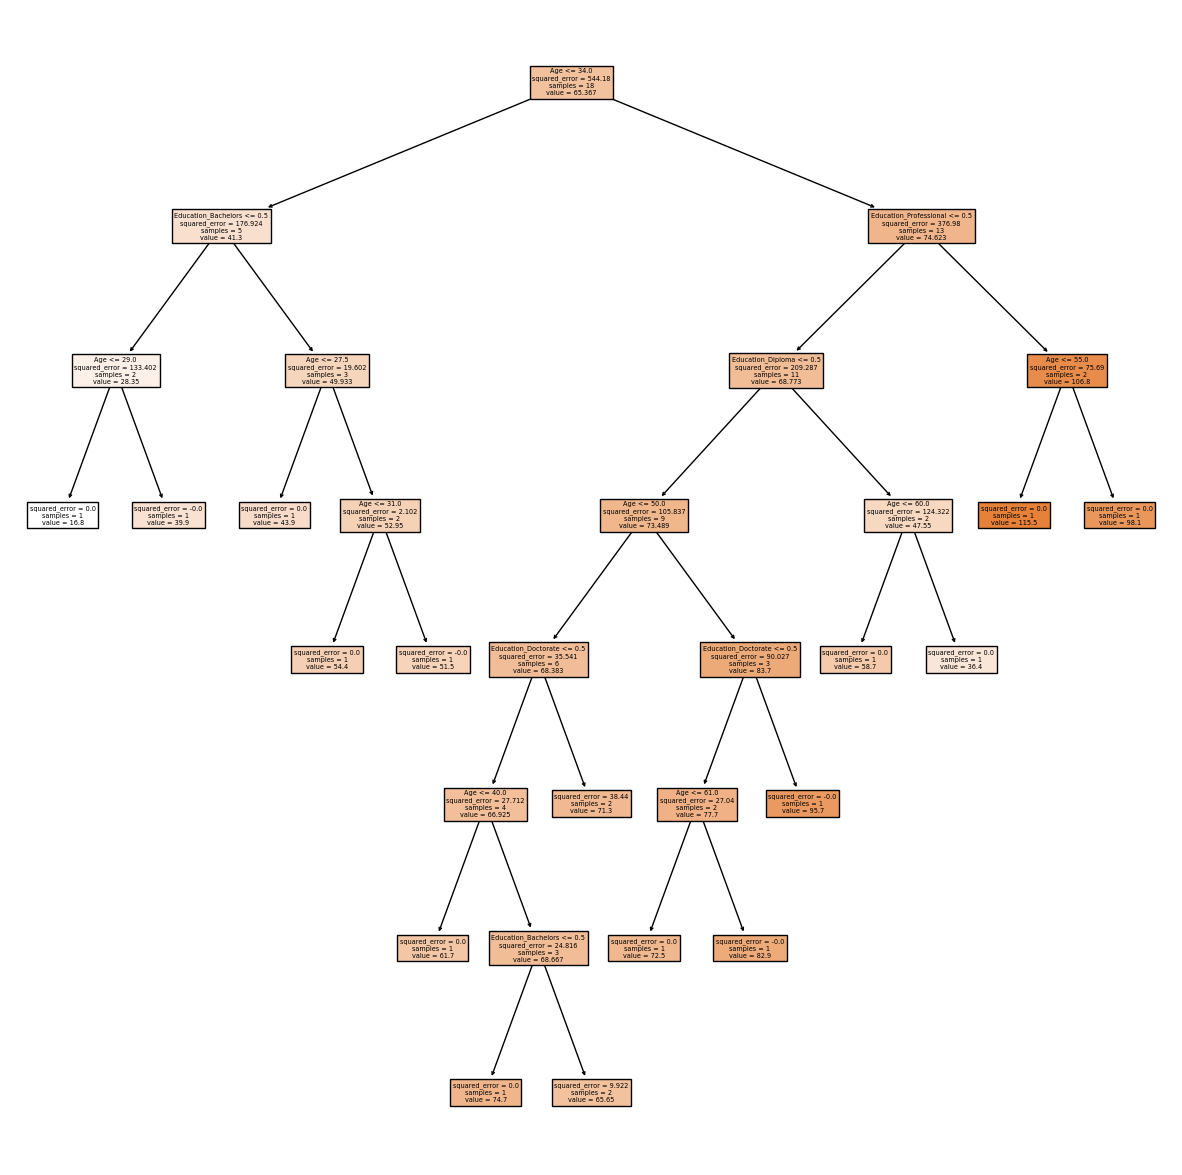

In [21]:
from sklearn import tree
plt.figure(figsize = (15,15))
tree.plot_tree(model, 
                   feature_names = list(X_train.columns), 
                   filled = True);

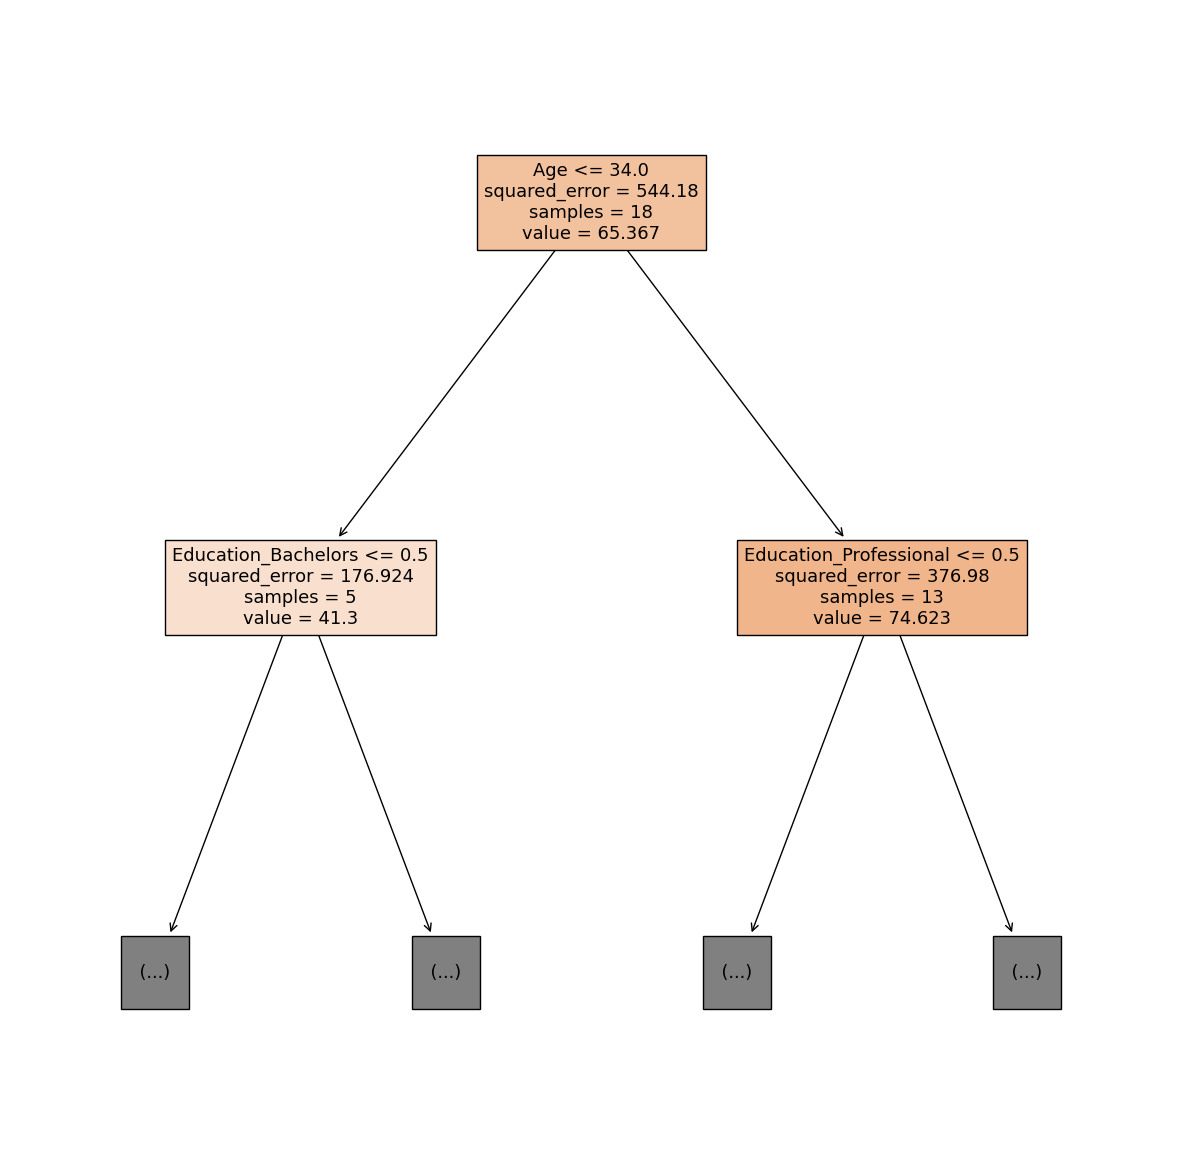

In [22]:
plt.figure(figsize = (15,15))
tree.plot_tree(model, 
               feature_names = list(X_train.columns), 
               filled = True,
               max_depth = 1);

In [11]:
importance = model.feature_importances_
importance

array([0.29502328, 0.00485015, 0.44709435, 0.03693129, 0.00517704,
       0.21092389])

NameError: name 'plt' is not defined

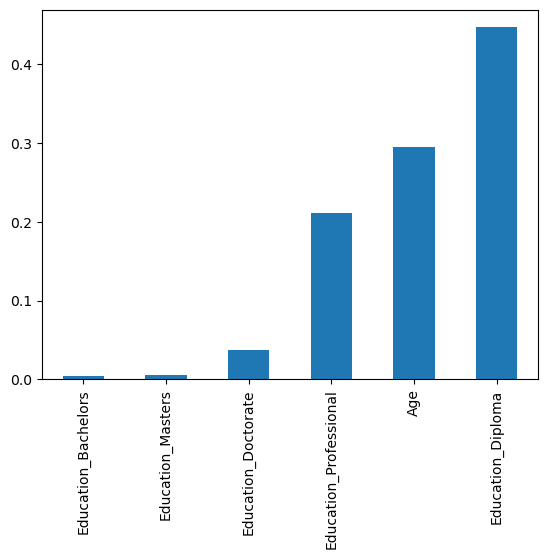

In [12]:
feature_importance = pd.Series(importance, index = X_train.columns)
feature_importance.sort_values().plot(kind = 'bar')
plt.ylabel('Importance');

## 6. Prune the Regression Tree

In [13]:
model.score(X_train, y_train)

0.9913066990778805

In [14]:
model.score(X_test, y_test)

0.9135062521837645

Let's get the list of effective alphas for the training data.

In [16]:
path = regressor.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
list(ccp_alphas)

[0.0,
 0.008571428571496566,
 0.10499999999995323,
 0.20023809523809177,
 1.8495767195761885,
 2.600079365079355,
 2.775317460317378,
 7.208571428570524,
 7.424940476190419,
 18.582920634920683,
 27.31049999999955,
 31.18788023088161,
 72.95255514327081,
 113.07248724489799,
 239.67920663265363]

We remove the maximum effective alpha because it is the trivial tree with just one node.

In [17]:
ccp_alphas = ccp_alphas[:-1]
list(ccp_alphas)

[0.0,
 0.008571428571496566,
 0.10499999999995323,
 0.20023809523809177,
 1.8495767195761885,
 2.600079365079355,
 2.775317460317378,
 7.208571428570524,
 7.424940476190419,
 18.582920634920683,
 27.31049999999955,
 31.18788023088161,
 72.95255514327081,
 113.07248724489799]

Next, we train several trees using the different values for alpha.

In [18]:
train_scores, test_scores = [], []
for alpha in ccp_alphas:
    regressor_ = DecisionTreeRegressor(random_state = 1234, ccp_alpha = alpha)
    model_ = regressor_.fit(X_train, y_train)
    train_scores.append(model_.score(X_train, y_train))
    test_scores.append(model_.score(X_test, y_test))

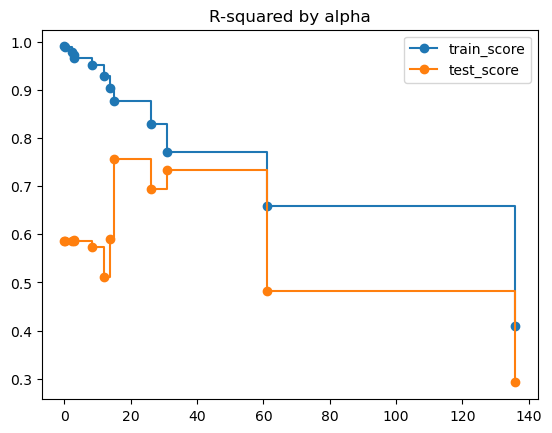

In [30]:
plt.plot(ccp_alphas, 
         train_scores, 
         marker = "o", 
         label = 'train_score', 
         drawstyle = "steps-post")
plt.plot(ccp_alphas, 
         test_scores, 
         marker = "o", 
         label = 'test_score', 
         drawstyle = "steps-post")
plt.legend()
plt.title('R-squared by alpha');

In [19]:
test_scores

[0.9135062521837645,
 0.9155288151026502,
 0.9153974914502314,
 0.9158724602157824,
 0.9158724602157824,
 0.9269697224369223,
 0.9250330873399897,
 0.9108358391478819,
 0.8805568036835474,
 0.8264464931390092,
 0.8654770082691879,
 0.828641245555796,
 0.6025492820938555,
 0.3326985872574366]

In [20]:
ix = test_scores.index(max(test_scores))
best_alpha = ccp_alphas[ix]
best_alpha

2.600079365079355

In [21]:
regressor_ = DecisionTreeRegressor(random_state = 1234, ccp_alpha = best_alpha)
model_ = regressor_.fit(X_train, y_train)

In [22]:
model_.score(X_train, y_train)

0.9756578768608689

In [23]:
model_.score(X_test, y_test)

0.9269697224369223

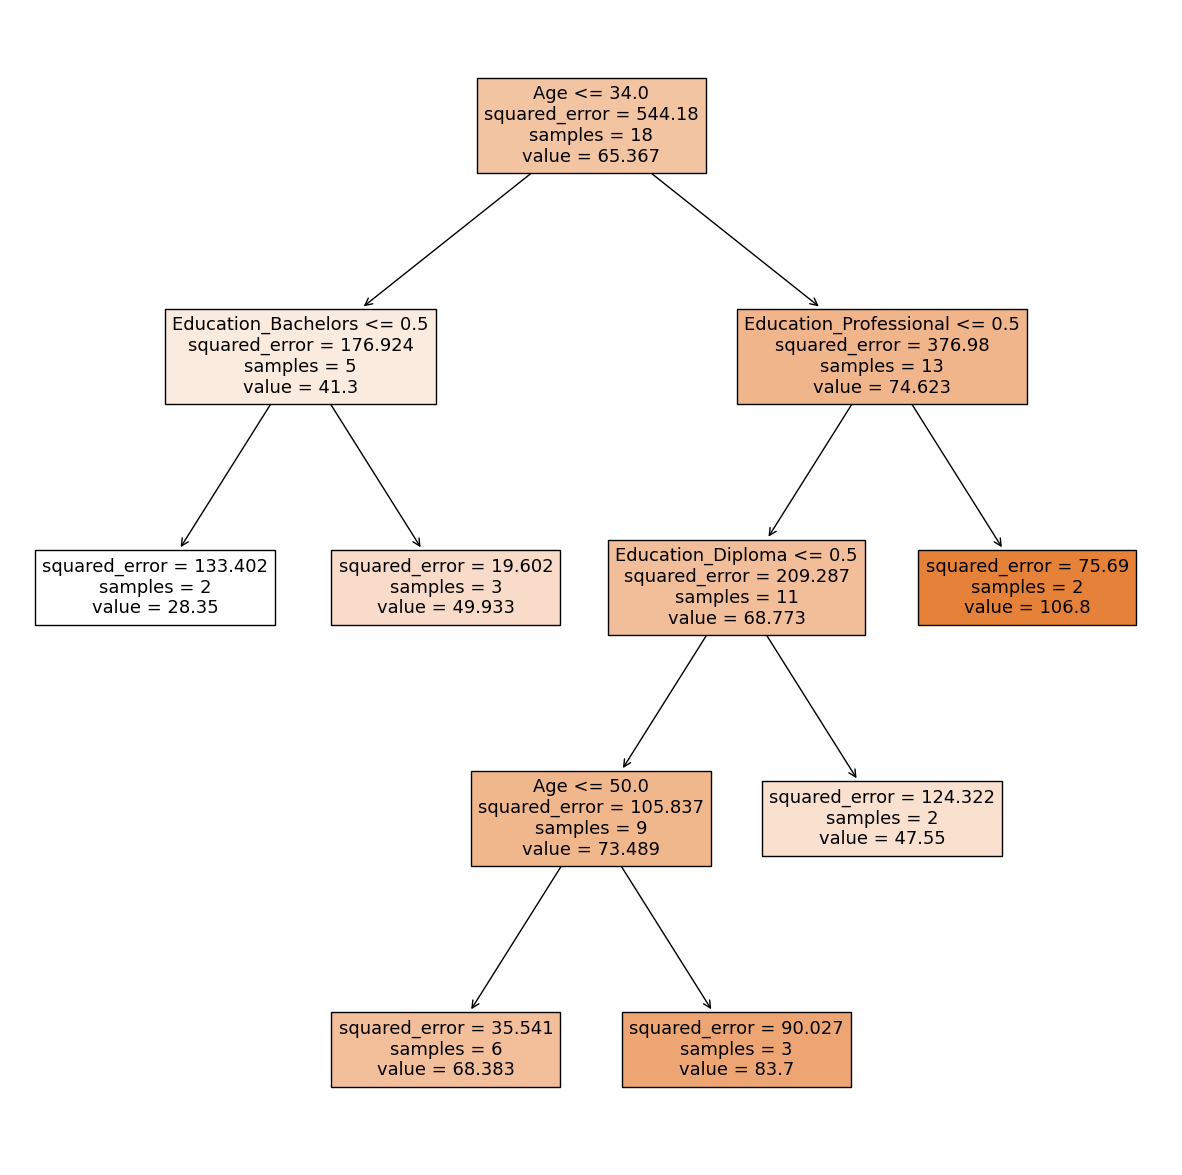

In [36]:
plt.figure(figsize = (15,15))
tree.plot_tree(model_, 
                   feature_names = list(X_train.columns),
                   filled = True);

In [31]:
import joblib
joblib.dump(model, 'rf_model.sav')

['rf_model.sav']

In [32]:
g= pd.DataFrame([[35, 0,0,1,0,0]])

In [61]:
model.predict(g)

c:\Users\fjm-std\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([71.3])

In [ ]:
import json
model_dict = {
    'tree_': model.tree_,
    'max_features_': model.max_features_,
    'n_features_': model.n_features_,
    'n_outputs_': model.n_outputs_,
    'feature_importances_': model.feature_importances_
}

with open('model.json', 'w') as f:
    json.dump(model_dict, f)
